### Make a python script which fetches the App reviews(500 latest ones) for any app that you like and do a basic sentiment analysis on those reviews?

### Let's start

In [1]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [2]:
from google_play_scraper import Sort, reviews_all

chartered_review = reviews_all(
    'com.bitla.mba.charteredbus',
    sleep_milliseconds=0,
    lang='en',
    country='in',
    sort=Sort.NEWEST,
)

In [3]:
df=pd.DataFrame(chartered_review)
df.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,43fe5631-87a7-40ab-8b54-c4e0f6d4bbdf,Rohit Singh,https://play-lh.googleusercontent.com/a-/AFdZu...,Ek Dum bekar 6.25 ki thi Habari bus 8 bje Hume...,1,0,None,2022-09-02 19:40:19,None,NaT
1,7dafa8ed-19e5-4a5c-bb42-00168c89e65d,yogesh choudhary,https://play-lh.googleusercontent.com/a/AItbvm...,Bad Very bad service harda rout,1,0,5.3,2022-08-31 22:18:25,We apologize that we didn’t live up to your ex...,2022-09-01 10:30:32
2,e5f8253f-5526-4d8e-b064-c6f5b6d3882f,umang agrawal,https://play-lh.googleusercontent.com/a-/AFdZu...,Very bad company 1 hour late bus in small root...,1,0,5.3,2022-08-29 20:18:39,Thank you for your feedback. We value our cust...,2022-08-30 10:34:56
3,c492040e-dc76-4645-a857-f6ff5217e0f6,jitendra dhillon,https://play-lh.googleusercontent.com/a-/AFdZu...,good services,5,0,5.3,2022-08-29 18:18:29,Thank you for taking the time to give us 5 sta...,2022-08-30 10:39:03
4,472ad102-b45d-4c73-ab7c-16eae7db30b5,Adarsh Sakrodiya,https://play-lh.googleusercontent.com/a-/AFdZu...,best app for bus services in Ashoknagar region,4,0,5.3,2022-08-28 20:47:30,Thank you for your feedback. We are glad you a...,2022-08-29 12:36:52


In [4]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1135 non-null   object        
 1   userName              1135 non-null   object        
 2   userImage             1135 non-null   object        
 3   content               1135 non-null   object        
 4   score                 1135 non-null   int64         
 5   thumbsUpCount         1135 non-null   int64         
 6   reviewCreatedVersion  965 non-null    object        
 7   at                    1135 non-null   datetime64[ns]
 8   replyContent          637 non-null    object        
 9   repliedAt             637 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 88.8+ KB


In [16]:
df.shape

(1135, 10)

In [6]:
rating=df['score']
rating.mean()

2.383259911894273

In [7]:
df['reviewCreatedVersion'].value_counts()

4.9     403
5.3     153
5.2     127
4.7     126
5.1      50
1.15     49
1.12     15
2.6      13
1.8       5
1.9       3
1.7       3
1.10      3
1.6       3
1.1       3
4.8       2
1.14      2
1.13      2
1.5       2
1.2       1
Name: reviewCreatedVersion, dtype: int64

In [8]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at siebert/sentiment-roberta-large-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


[{'label': 'POSITIVE', 'score': 0.9988656044006348}]


In [27]:
df=(df[df['content'].apply(lambda x: len(x.split()) < 10)])
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
1,7dafa8ed-19e5-4a5c-bb42-00168c89e65d,yogesh choudhary,https://play-lh.googleusercontent.com/a/AItbvm...,Bad Very bad service harda rout,1,0,5.3,2022-08-31 22:18:25,We apologize that we didn’t live up to your ex...,2022-09-01 10:30:32
3,c492040e-dc76-4645-a857-f6ff5217e0f6,jitendra dhillon,https://play-lh.googleusercontent.com/a-/AFdZu...,good services,5,0,5.3,2022-08-29 18:18:29,Thank you for taking the time to give us 5 sta...,2022-08-30 10:39:03
4,472ad102-b45d-4c73-ab7c-16eae7db30b5,Adarsh Sakrodiya,https://play-lh.googleusercontent.com/a-/AFdZu...,best app for bus services in Ashoknagar region,4,0,5.3,2022-08-28 20:47:30,Thank you for your feedback. We are glad you a...,2022-08-29 12:36:52
5,8f98eac6-5a35-41c0-a5bf-31582a2cd1bb,Dhan Singh Tomar,https://play-lh.googleusercontent.com/a/AItbvm...,Goodbto book tickets only...,4,0,5.3,2022-08-27 13:17:26,We are grateful that you took the time to rate...,2022-08-27 13:28:33
8,51a103fb-addf-4074-968e-fe49830863b3,sharanga borah,https://play-lh.googleusercontent.com/a-/AFdZu...,Easy and convenient. Cheaper than redbus.,4,0,5.3,2022-08-25 14:37:56,Thank you for rating us. We are glad you are l...,2022-08-25 14:47:34
...,...,...,...,...,...,...,...,...,...,...
1128,f09b8988-5a9c-4c6c-81da-29f966b5f0d7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,0,1.5,2018-06-03 22:53:14,None,NaT
1130,a08e7111-e389-4905-849c-36df98176fc9,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,1,1.5,2018-06-01 23:28:36,None,NaT
1131,a2b80e1d-039a-476c-a99b-1cf87231cf1c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,A nice apps,5,0,1.1,2018-05-29 22:28:57,None,NaT
1132,b4665b2b-9e62-407d-a434-0051491836ba,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Nice,5,0,1.1,2018-05-29 14:32:10,None,NaT


In [28]:
df.shape

(590, 10)

In [29]:
df['result']=df['content'].apply(lambda text :sentiment_analysis(text) )

In [30]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,result
1,7dafa8ed-19e5-4a5c-bb42-00168c89e65d,yogesh choudhary,https://play-lh.googleusercontent.com/a/AItbvm...,Bad Very bad service harda rout,1,0,5.3,2022-08-31 22:18:25,We apologize that we didn’t live up to your ex...,2022-09-01 10:30:32,"[{'label': 'NEGATIVE', 'score': 0.999500274658..."
3,c492040e-dc76-4645-a857-f6ff5217e0f6,jitendra dhillon,https://play-lh.googleusercontent.com/a-/AFdZu...,good services,5,0,5.3,2022-08-29 18:18:29,Thank you for taking the time to give us 5 sta...,2022-08-30 10:39:03,"[{'label': 'POSITIVE', 'score': 0.998825609683..."
4,472ad102-b45d-4c73-ab7c-16eae7db30b5,Adarsh Sakrodiya,https://play-lh.googleusercontent.com/a-/AFdZu...,best app for bus services in Ashoknagar region,4,0,5.3,2022-08-28 20:47:30,Thank you for your feedback. We are glad you a...,2022-08-29 12:36:52,"[{'label': 'POSITIVE', 'score': 0.997978508472..."
5,8f98eac6-5a35-41c0-a5bf-31582a2cd1bb,Dhan Singh Tomar,https://play-lh.googleusercontent.com/a/AItbvm...,Goodbto book tickets only...,4,0,5.3,2022-08-27 13:17:26,We are grateful that you took the time to rate...,2022-08-27 13:28:33,"[{'label': 'POSITIVE', 'score': 0.980324208736..."
8,51a103fb-addf-4074-968e-fe49830863b3,sharanga borah,https://play-lh.googleusercontent.com/a-/AFdZu...,Easy and convenient. Cheaper than redbus.,4,0,5.3,2022-08-25 14:37:56,Thank you for rating us. We are glad you are l...,2022-08-25 14:47:34,"[{'label': 'POSITIVE', 'score': 0.998811602592..."
...,...,...,...,...,...,...,...,...,...,...,...
1128,f09b8988-5a9c-4c6c-81da-29f966b5f0d7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,0,1.5,2018-06-03 22:53:14,None,NaT,"[{'label': 'POSITIVE', 'score': 0.998415231704..."
1130,a08e7111-e389-4905-849c-36df98176fc9,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,1,1.5,2018-06-01 23:28:36,None,NaT,"[{'label': 'POSITIVE', 'score': 0.998415231704..."
1131,a2b80e1d-039a-476c-a99b-1cf87231cf1c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,A nice apps,5,0,1.1,2018-05-29 22:28:57,None,NaT,"[{'label': 'POSITIVE', 'score': 0.998644292354..."
1132,b4665b2b-9e62-407d-a434-0051491836ba,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Nice,5,0,1.1,2018-05-29 14:32:10,None,NaT,"[{'label': 'POSITIVE', 'score': 0.997769474983..."


In [31]:
df['sentiment']=df['result'].apply(lambda x : x[0]['label'])
df['probability']=df['result'].apply(lambda x : x[0]['score'] )
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,result,sentiment,probability
1,7dafa8ed-19e5-4a5c-bb42-00168c89e65d,yogesh choudhary,https://play-lh.googleusercontent.com/a/AItbvm...,Bad Very bad service harda rout,1,0,5.3,2022-08-31 22:18:25,We apologize that we didn’t live up to your ex...,2022-09-01 10:30:32,"[{'label': 'NEGATIVE', 'score': 0.999500274658...",NEGATIVE,0.999500
3,c492040e-dc76-4645-a857-f6ff5217e0f6,jitendra dhillon,https://play-lh.googleusercontent.com/a-/AFdZu...,good services,5,0,5.3,2022-08-29 18:18:29,Thank you for taking the time to give us 5 sta...,2022-08-30 10:39:03,"[{'label': 'POSITIVE', 'score': 0.998825609683...",POSITIVE,0.998826
4,472ad102-b45d-4c73-ab7c-16eae7db30b5,Adarsh Sakrodiya,https://play-lh.googleusercontent.com/a-/AFdZu...,best app for bus services in Ashoknagar region,4,0,5.3,2022-08-28 20:47:30,Thank you for your feedback. We are glad you a...,2022-08-29 12:36:52,"[{'label': 'POSITIVE', 'score': 0.997978508472...",POSITIVE,0.997979
5,8f98eac6-5a35-41c0-a5bf-31582a2cd1bb,Dhan Singh Tomar,https://play-lh.googleusercontent.com/a/AItbvm...,Goodbto book tickets only...,4,0,5.3,2022-08-27 13:17:26,We are grateful that you took the time to rate...,2022-08-27 13:28:33,"[{'label': 'POSITIVE', 'score': 0.980324208736...",POSITIVE,0.980324
8,51a103fb-addf-4074-968e-fe49830863b3,sharanga borah,https://play-lh.googleusercontent.com/a-/AFdZu...,Easy and convenient. Cheaper than redbus.,4,0,5.3,2022-08-25 14:37:56,Thank you for rating us. We are glad you are l...,2022-08-25 14:47:34,"[{'label': 'POSITIVE', 'score': 0.998811602592...",POSITIVE,0.998812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,f09b8988-5a9c-4c6c-81da-29f966b5f0d7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,0,1.5,2018-06-03 22:53:14,None,NaT,"[{'label': 'POSITIVE', 'score': 0.998415231704...",POSITIVE,0.998415
1130,a08e7111-e389-4905-849c-36df98176fc9,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,1,1.5,2018-06-01 23:28:36,None,NaT,"[{'label': 'POSITIVE', 'score': 0.998415231704...",POSITIVE,0.998415
1131,a2b80e1d-039a-476c-a99b-1cf87231cf1c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,A nice apps,5,0,1.1,2018-05-29 22:28:57,None,NaT,"[{'label': 'POSITIVE', 'score': 0.998644292354...",POSITIVE,0.998644
1132,b4665b2b-9e62-407d-a434-0051491836ba,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Nice,5,0,1.1,2018-05-29 14:32:10,None,NaT,"[{'label': 'POSITIVE', 'score': 0.997769474983...",POSITIVE,0.997769


In [35]:
df['probability'].mean()


0.9942899628210876

In [36]:
df['sentiment'].value_counts()

POSITIVE    381
NEGATIVE    209
Name: sentiment, dtype: int64

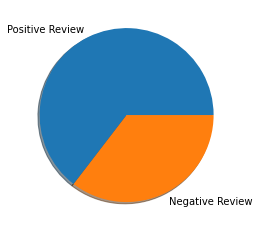

In [54]:
import matplotlib.pyplot as plt
a=plt.pie(df['sentiment'].value_counts(),labels=['Positive Review','Negative Review'],shadow=True,normalize=True)